<a href="https://colab.research.google.com/github/JWoinski/PracaDyp/blob/main/Clustering_KMEANS_WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

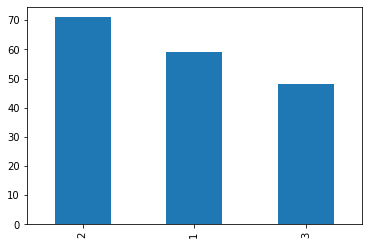

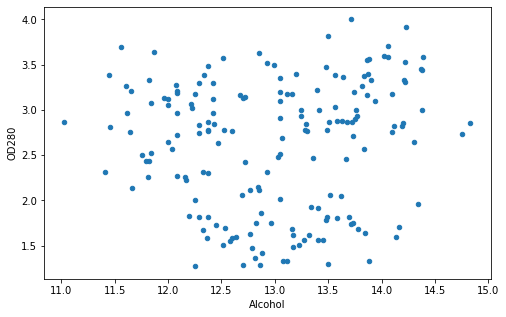

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# nazwy klas w bazie
names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280',
'Proline']
#pobieranie bazy
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = names)
data.head(100)
data['Class'].value_counts().plot(kind='bar')
#przedstawienie danych na wykresie
data.plot.scatter(x = 'Alcohol', y = 'OD280', figsize=(8,5))

     OD280  Alcohol
0     3.92    14.23
1     3.40    13.20
2     3.17    13.16
3     3.45    14.37
4     2.93    13.24
..     ...      ...
173   1.74    13.71
174   1.56    13.40
175   1.56    13.27
176   1.62    13.17
177   1.60    14.13

[178 rows x 2 columns]
      OD280    Alcohol
0  3.163750  13.438472
1  2.921053  11.908684
2  1.854265  13.147206


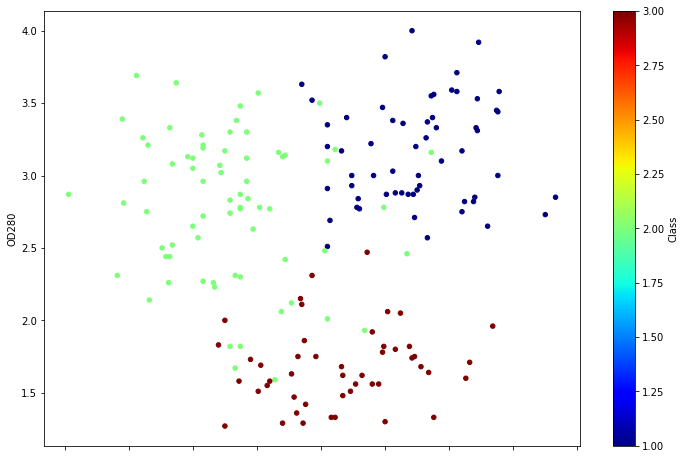

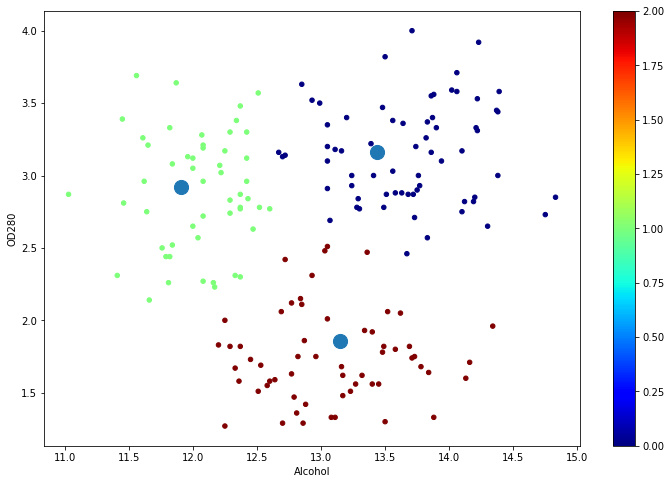

In [87]:
#grupowanie bazy na podstawie klas "Alcohol" i "OD280"
data.plot.scatter(x = 'Alcohol', y = 'OD280', c= 'Class', figsize=(12,8), colormap='jet')
data.iloc[:,[12,1]].head()
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state =5).fit(data.iloc[:,[12,1]])
print((data.iloc[:,[12,1]]))

centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(data.iloc[:,[12,1]].columns.values))
print(centroids_df)
fig, ax = plt.subplots(1, 1)

data.plot.scatter(x = 'Alcohol', y = 'OD280', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
#ustawianie centroidów dla klastrów
centroids_df.plot.scatter(x = 'Alcohol', y = 'OD280', ax = ax, s = 200, mark_right=False)
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 150, random_state = 5).fit(data.iloc[:,[12,1]])
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(data.iloc[:,[12,1]].columns.values))
